# FileStore example
* In this example we will show how to use the FileStore backend to read time series data from ZRXP files and how to display the data.

In [1]:
import platform
import pkg_resources
from IPython.core.display import display, HTML
from datetime import datetime
from pandas import DataFrame
import matplotlib
import matplotlib.pyplot as plt
from kisters.water.time_series.file_io import FileStore, ZRXPFormat
from kisters.water.time_series.store_decorators import AddMetadataStore, CacheStore
matplotlib.style.use('ggplot')

In [2]:
# Version information
data = [['Python', platform.python_version() + ' ' + platform.architecture()[0]],
          ['OS', platform.platform()],
          ['pandas', pkg_resources.require("pandas")[0].version],
          ['matplotlib', pkg_resources.require("matplotlib")[0].version],
          ['kisters.water.time_series', pkg_resources.require("kisters.water.time_series")[0].version]]
html = "<table>"
html += "<tr><th style=\"text-align:left\">Software</th><th style=\"text-align:left\">Version</th></tr>"
for name, version in data:
    html += "<tr><td style=\"text-align:left\">%s</td><td style=\"text-align:left\">%s</td></tr>" % (name, version)
html += "<tr><td style=\"text-align:left\">%s</td></tr>" % (datetime.now().strftime('%c'))
html += "</table>"
display(HTML(html))

In [3]:
fs = CacheStore(FileStore("testdata", ZRXPFormat()))

In [4]:
ts_list = fs.get_by_filter('*')
DataFrame([ts.metadata for ts in ts_list])

,CNAME,CNR,CUNIT,LAYOUT,RINVAL,RTIMELVL,SANR,SNAME,TZ,ZRX,...,name,parameterName,parameterNumber,shortName,stationName,stationNumber,timeLevel,timezone,tsPath,unit
0,HG,HG,M,NaN,-777,NaN,NaN,ELBOW RIVER AT BRAGG CREEK,UTC-7,"{'data_offset': '246', 'file': 'C:\Users\amora...",...,05BJ004.HG.datum.O,HG,HG,05BJ004.HG.datum.O,ELBOW RIVER AT BRAGG CREEK,NaN,NaN,UTC-7,05BJ004.HG.datum.O,M
1,HG,HG,M,"(timestamp,value)",-777,high-resolution,1,ELBOW RIVER AT BRAGG CREEK,UTC-7,"{'data_offset': '246', 'file': 'C:\Users\amora...",...,05BJ004.HG.nrt.O,HG,HG,05BJ004.HG.nrt.O,ELBOW RIVER AT BRAGG CREEK,1,high-resolution,UTC-7,inside/05BJ004.HG.nrt.O,M
2,NaN,NaN,M,NaN,-777,NaN,NaN,NaN,UTC+1,"{'data_offset': '68', 'file': 'C:\Users\amoral...",...,K-Greim-SG-cmd-2000-2004,NaN,NaN,K-Greim-SG-cmd-2000-2004,NaN,NaN,NaN,UTC+1,K-Greim-SG-cmd-2000-2004,M


In [6]:
ts = ts_list[0]
ts.name

'05BJ004.HG.datum.O'

In [6]:
ts = ts_list[1]
ts.name

'05BJ004.HG.nrt.O'

In [7]:
ts_list = fs.get_by_filter("*05B*")
DataFrame([ts.metadata for ts in ts_list])

,CNAME,CNR,CUNIT,RINVAL,SNAME,TZ,ZRX,ZRXPCREATOR,columns,dataCoverageFrom,...,id,invalidValue,name,parameterName,parameterNumber,shortName,stationName,timezone,tsPath,unit
0,HG,HG,M,-777,ELBOW RIVER AT BRAGG CREEK,UTC-7,"{'data_offset': '246', 'file': 'testdata/05BJ0...",ZRXP-Fileexport,"[timestamp, value, value.quality, value.interp...",1999-12-03T23:00:00+00:00,...,None,-777,05BJ004.HG.datum.O,HG,HG,05BJ004.HG.datum.O,ELBOW RIVER AT BRAGG CREEK,UTC-7,05BJ004.HG.datum.O,M
1,HG,HG,M,-777,ELBOW RIVER AT BRAGG CREEK,UTC-7,"{'data_offset': '246', 'file': 'testdata/insid...",ZRXP-Fileexport,"[timestamp, value, value.quality, value.interp...",1999-10-31T00:00:00+00:00,...,None,-777,05BJ004.HG.nrt.O,HG,HG,05BJ004.HG.nrt.O,ELBOW RIVER AT BRAGG CREEK,UTC-7,inside/05BJ004.HG.nrt.O,M


In [8]:
ts_list = fs.get_by_filter("in*/05*")
DataFrame([ts.metadata for ts in ts_list])

,CNAME,CNR,CUNIT,RINVAL,SNAME,TZ,ZRX,ZRXPCREATOR,columns,dataCoverageFrom,...,id,invalidValue,name,parameterName,parameterNumber,shortName,stationName,timezone,tsPath,unit
0,HG,HG,M,-777,ELBOW RIVER AT BRAGG CREEK,UTC-7,"{'data_offset': '246', 'file': 'testdata/insid...",ZRXP-Fileexport,"[timestamp, value, value.quality, value.interp...",1999-10-31T00:00:00+00:00,...,None,-777,05BJ004.HG.nrt.O,HG,HG,05BJ004.HG.nrt.O,ELBOW RIVER AT BRAGG CREEK,UTC-7,inside/05BJ004.HG.nrt.O,M


In [9]:
ts = ts_list[0]
start = datetime(2001, 1, 1)
end = datetime(2001, 2, 1)

df = ts.read_data_frame(start = start, end = end)
df

,value,value.quality,value.interpolation
timestamp,,,
2001-01-01 12:00:00+00:00,1.260,200,102
2001-01-01 13:00:00+00:00,1.264,200,102
2001-01-01 14:00:00+00:00,1.272,200,102
2001-01-01 15:00:00+00:00,1.282,200,102
2001-01-01 16:00:00+00:00,1.282,200,102
2001-01-01 17:00:00+00:00,1.278,200,102
2001-01-01 18:00:00+00:00,1.274,200,102
2001-01-01 19:00:00+00:00,1.270,200,102
2001-01-01 20:00:00+00:00,1.268,200,102


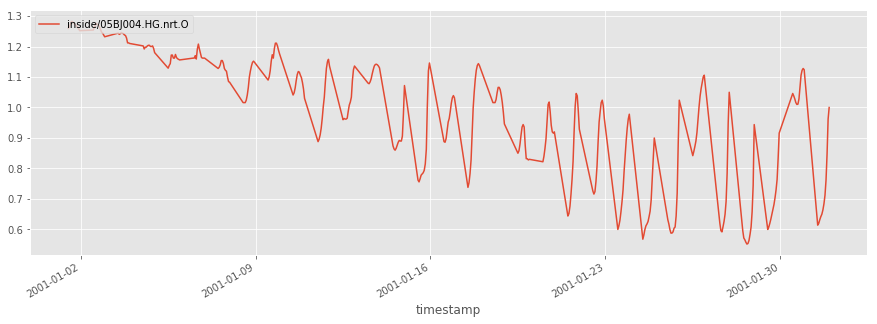

In [10]:
plt.figure(figsize=(15, 5))
df['value'].plot(label=ts.path, figsize=(15, 5))
#ts.plot()
plt.legend(loc=2)
plt.show()